In [45]:
#Using CNN in Mnist dataset

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [47]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

3


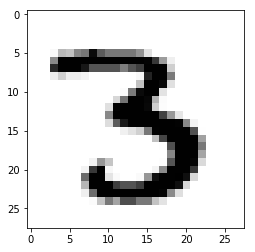

In [48]:
#visualizing images
image_index = 12
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [49]:
x_train.shape[0]

60000

In [50]:
#Reshaping the array to 4-dims so that it can work with the keras API

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [51]:
#Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the RGB coddes by dividing it to the max RGB value
x_train /= 255
x_test /= 255

In [72]:
x_test.shape

(10000, 28, 28, 1)

In [53]:
#Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation = tf.nn.softmax))

In [54]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(x = x_train, y = y_train,epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1819 - acc: 0.9448
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0778 - acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0566 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0464 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0375 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0325 - acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0314 - acc: 0.9893
Epoch 8/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0269 - acc: 0.9914
Epoch 9/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0239 - acc: 0.9918
Epoch 10/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0252 - acc: 0.9923

In [55]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 274us/step


[0.08580068197021974, 0.9831]

In [57]:
model.save('mininstmodel.h5')

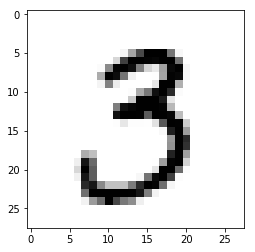

In [84]:
image_index = 90
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')

In [85]:
pred = model.predict(x_test[image_index].reshape(1,28, 28,1))

In [86]:
print(pred.argmax())

3
